In [64]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [77]:
data = pd.read_csv('lab07.csv')
data

,x1,x2,y
0,2.0,4.0,1
1,1.0,2.0,1
2,3.0,2.0,1
3,1.0,3.0,0
4,2.0,1.0,0
5,3.0,3.0,0
6,4.0,1.0,0
7,4.0,3.5,0


In [66]:
#                 w0 + w1 x1 + w2 x2  = 0
w = [0, -1, 1]

In [75]:

#                  w2 x2 = -w0 - w1 x1
#                  x2 = (-w0 / w2) + (- w1 / w2) x
# Therefore
#                  m = -w1 / w2 = ,    b = -w0 / w2





b = -w[0] / w[2]
m = -w[1] / w[2]

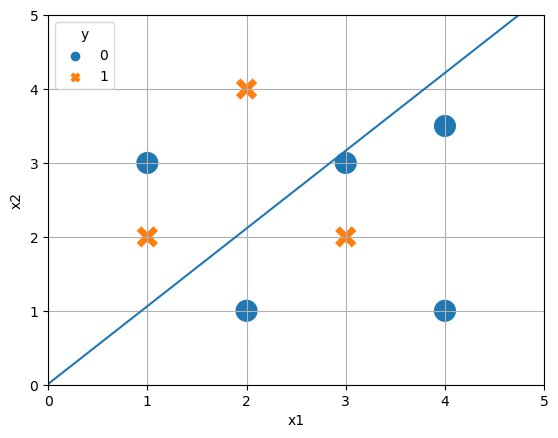

In [76]:
sns.scatterplot(data, x='x1', y='x2', hue='y', style='y', s=300)
plt.plot([0, 5], [b, b + m*5])
plt.xlim(0,5)
plt.ylim(0,5)
plt.grid()

In [69]:
# Current scores
X = data[['x1', 'x2']]
data['score'] = w[0] + X.dot(w[1:])
data

,x1,x2,y,score
0,2.0,4.0,1,2.0
1,1.0,2.0,1,1.0
2,3.0,2.0,1,-1.0
3,1.0,3.0,0,2.0
4,2.0,1.0,0,-1.0
5,3.0,3.0,0,0.0
6,4.0,1.0,0,-3.0
7,4.0,3.5,0,-0.5


In [70]:
# predictions
data['ypred'] = (data.score >= 0).astype(int)
data

,x1,x2,y,score,ypred
0,2.0,4.0,1,2.0,1
1,1.0,2.0,1,1.0,1
2,3.0,2.0,1,-1.0,0
3,1.0,3.0,0,2.0,1
4,2.0,1.0,0,-1.0,0
5,3.0,3.0,0,0.0,1
6,4.0,1.0,0,-3.0,0
7,4.0,3.5,0,-0.5,0


In [71]:
# Where we have prediction errors
data['compare'] = data.y - data.ypred
data

,x1,x2,y,score,ypred,compare
0,2.0,4.0,1,2.0,1,0
1,1.0,2.0,1,1.0,1,0
2,3.0,2.0,1,-1.0,0,1
3,1.0,3.0,0,2.0,1,-1
4,2.0,1.0,0,-1.0,0,0
5,3.0,3.0,0,0.0,1,-1
6,4.0,1.0,0,-3.0,0,0
7,4.0,3.5,0,-0.5,0,0


In [72]:
# Contribution to error
data['error'] = np.abs(data.y-data.ypred) * np.abs(data.score)
print("Mean Perceptron Error: ", data.error.mean())
data

Mean Perceptron Error:  0.375


,x1,x2,y,score,ypred,compare,error
0,2.0,4.0,1,2.0,1,0,0.0
1,1.0,2.0,1,1.0,1,0,0.0
2,3.0,2.0,1,-1.0,0,1,1.0
3,1.0,3.0,0,2.0,1,-1,2.0
4,2.0,1.0,0,-1.0,0,0,0.0
5,3.0,3.0,0,0.0,1,-1,0.0
6,4.0,1.0,0,-3.0,0,0,0.0
7,4.0,3.5,0,-0.5,0,0,0.0


In [73]:
# Adjust w0' = w0 + alpha * (y - ypred)
alpha = 0.01
data['w0_adj'] = alpha * (data.y - data.ypred)
data['w1_adj'] = alpha * (data.y - data.ypred) * data.x1
data['w2_adj'] = alpha * (data.y - data.ypred) * data.x2
data


,x1,x2,y,score,ypred,compare,error,w0_adj,w1_adj,w2_adj
0,2.0,4.0,1,2.0,1,0,0.0,0.00,0.00,0.00
1,1.0,2.0,1,1.0,1,0,0.0,0.00,0.00,0.00
2,3.0,2.0,1,-1.0,0,1,1.0,0.01,0.03,0.02
3,1.0,3.0,0,2.0,1,-1,2.0,-0.01,-0.01,-0.03
4,2.0,1.0,0,-1.0,0,0,0.0,0.00,0.00,0.00
5,3.0,3.0,0,0.0,1,-1,0.0,-0.01,-0.03,-0.03
6,4.0,1.0,0,-3.0,0,0,0.0,0.00,0.00,0.00
7,4.0,3.5,0,-0.5,0,0,0.0,0.00,0.00,0.00


In [74]:

w[0] = w[0] + data.w0_adj.sum()
w[1] = w[1] + data.w1_adj.sum()
w[2] = w[2] + data.w2_adj.sum()
w

[-0.01, -1.01, 0.96]